<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h2>A1: Regression Model Development</h2>



<em><strong>Birth Weight Prediction</strong></em><br>

Machine Learning - DAT-5303 - BMBAN2

<em>Martine Elisabeth Stø Johansen<em><br>
    Student ID: 10874334 
    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>References</h3><br>

Howard E. LeWine, MD. (2020). Drinking a little alcohol early in pregnancy may be okay. Harvard Health Publishing
https://www.health.harvard.edu/blog/study-no-connection-between-drinking-alcohol-early-in-pregnancy-and-birth-problems-201309106667
    
Virji SK. The relationship between alcohol consumption during pregnancy and infant birthweight. An epidemiologic study. Acta Obstet Gynecol Scand. 1991;70(4-5):303-8. doi: 10.3109/00016349109007877. PMID: 1746254

    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Overview of Dataset

In [1]:
# Importing packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization essentials
import seaborn as sns # enhanced data visualization
import numpy as np 
from sklearn.model_selection import train_test_split # setting up train and test data frames
import statsmodels.formula.api as smf # regression modeling
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
import sklearn 


# Specifying path to file
file = "./birthweight_low.xlsx" 


# Reading the file into Python
birth_weight = pd.read_excel(io = file)

# Checking the first 10 rows of the dataset
print(birth_weight.head(n = 10))

# Formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birth_weight.shape[0]}
Features:     {birth_weight.shape[1]}
""")

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   
5    67   11.0       4    8.0    40    8.0      4      9    16     14     0   
6    54   12.0       2   12.0    46   12.0      9      9    17     12     1   
7    71   14.0       4    7.0    51   11.0      9      8    15     13     0   
8    56   12.0       1    9.0    53   14.0      8      9    14      9     1   
9    58   12.0       2   12.0    61   16.0      9      9    13      6     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1

In [2]:
# Using describe to get an quick overview
birth_weight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


## Dropping Features 

As "omaps" and "fmaps" are features that are measured during birth, they don't affect the size of the baby, and thereby can not be used to predict estimated birth weight and are therefore dropped in this analysis.

In [3]:
# Dropping "omaps" and "fmaps"
birth_weight.drop('omaps', axis = 1, inplace=True)
birth_weight.drop('fmaps', axis = 1, inplace=True)

In [4]:
# Formatting and printing the new dimensions of the dataset without "omaps" and "fmaps"
print(f"""
Size of Original Dataset
------------------------
Observations: {birth_weight.shape[0]}
Features:     {birth_weight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     16



## Missing Values

The dataset includes missing values under the features "meduc", "npvis" and "feduc". To approach this, the values has been imputed with mode as it is integers. 

In [5]:
# summing together the results per column
birth_weight.isnull().any(axis = 0)

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [6]:
# Defining and checking mode to for imputing "meduc" 
meduc_mode = birth_weight["meduc"].mode()[0]
print(meduc_mode)

# Defining and checking mode to for imputing "npvis" 
npvis_mode = birth_weight["npvis"].mode()[0]
print(npvis_mode)

# Defining and checking mode to for imputing "feduc" 
feduc_mode = birth_weight["feduc"].mode()[0]
print(feduc_mode)

12.0
12.0
12.0


In [7]:
# Imputing missing values with the mode
birth_weight['meduc'].fillna(value = meduc_mode,
                            inplace = True)


# Imputing missing values with the mode
birth_weight['npvis'].fillna(value = npvis_mode,
                            inplace = True)


# Imputing missing values with the mode
birth_weight['feduc'].fillna(value = feduc_mode,
                            inplace = True)

In [8]:
# Making sure all missing values have been taken care of
birth_weight.isnull().sum().any()

False

## Exploring Data

In [9]:
# Setting up features for loop
continuous_data = ['bwght', 'mage', 'meduc', 'feduc', 'fage', 'npvis']

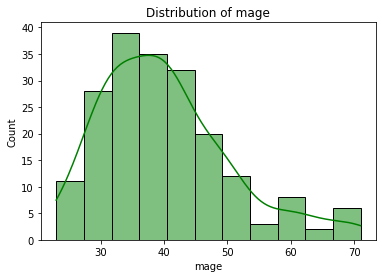

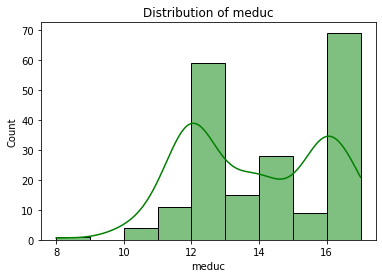

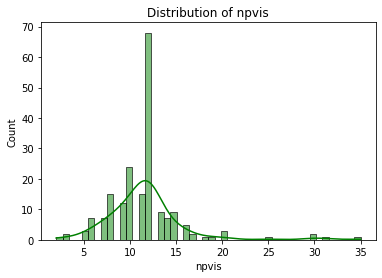

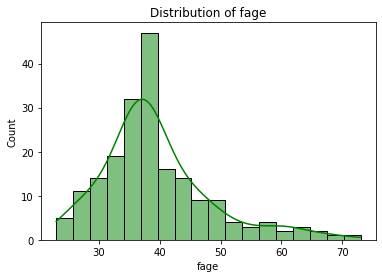

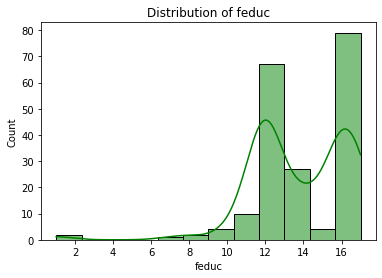

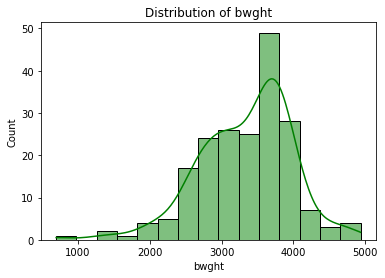

In [10]:
# Looping continuous data to explore distrubution
for column in birth_weight:

    if column in continuous_data:
        sns.histplot(data   = birth_weight,
              x      = column,
              kde    = True,
              color = "green")
        
        

        plt.title(label   = f"Distribution of {column}")
        plt.xlabel(xlabel = column) 
        plt.ylabel(ylabel = "Count")
        plt.show()

## Transforming to Log 

In the following section, log is used to reduce the high skewness in some of the explanatory features to reduce the effect of the skewness and the outliers.

In [11]:
# Transforming skewed explanatory features into log
birth_weight['log_bwght'] = np.log(birth_weight['bwght'])

birth_weight['log_npvis'] = np.log(birth_weight['npvis'])

birth_weight['log_fage'] = np.log(birth_weight['fage'])

birth_weight['log_mage'] = np.log(birth_weight['mage'])


In [12]:
# Checking log features correlation with original features 
log_corr = birth_weight.loc[ : , 
                            ['bwght',
                             'log_bwght',
                             'npvis' ,
                             'log_npvis',
                             'fage',
                             'log_fage',
                             'mage',
                             'log_mage'] ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


# Formatting the corraltion chart
log_corr.loc[['bwght', 'log_bwght'] ,
             ['npvis', 'log_npvis',  
             'fage' , 'log_fage', 
             'mage', 'log_mage'] ]

,npvis,log_npvis,fage,log_fage,mage,log_mage
bwght,0.06,0.16,-0.40,-0.38,-0.46,-0.42
log_bwght,0.11,0.24,-0.41,-0.39,-0.50,-0.44


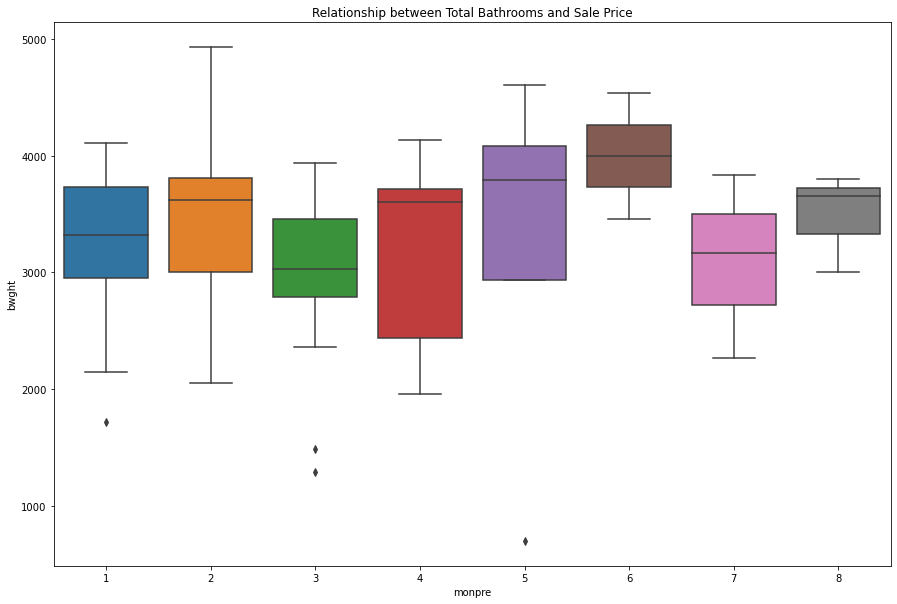


Number of Observations
------------------------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64




In [13]:
#############################################################################
# With other variables than above, creating a new boxplots to check for differences  
# in median lines for each  boxplot to see if it has a straight trend-line. 
# Changed the feature selected and ran the code several times to get an overview. 
#############################################################################

feature_test = 'monpre'

# Setting boxplot figure size
fig, ax = plt.subplots(figsize = (15, 10))


# Setting titles and labels
sns.boxplot(x    = feature_test,
            y    = 'bwght',
            data = birth_weight)


# Setting titles and labels
plt.title(label   = 'Relationship between Total Bathrooms and Sale Price')
plt.xlabel(xlabel = feature_test)
plt.ylabel(ylabel = 'bwght')


# Displaying the boxplot
plt.tight_layout
plt.show()


# Checking number of observations to ensure enough vaiarity in potential features
print(f"""
Number of Observations
------------------------
{birth_weight[feature_test].value_counts().sort_index()}

""")

##  Creating Categories and Dummies

In [14]:
# Creating a dummy column 
birth_weight['monpre_condensed'] = 0

# Using itterrows to replace previous column with new column formated to fit
for index, col in birth_weight.iterrows():
    
    # Conditionals to change the values in the new column
    if birth_weight.loc[index, 'monpre'] == 1:
        birth_weight.loc[index, 'monpre_condensed'] = 'm_one'
        
    elif birth_weight.loc[index, 'monpre'] == 2:
        birth_weight.loc[index, 'monpre_condensed'] = 'm_two'

    elif birth_weight.loc[index, 'monpre'] > 2:
        birth_weight.loc[index, 'monpre_condensed'] = 'm_three_or_later'    
        
        
# Checking number of observations to ensure enough vaiarity in potential features
print(f"""
Number of Observations
------------------------
{birth_weight['monpre_condensed'].value_counts().sort_index()}

""")


Number of Observations
------------------------
m_one               45
m_three_or_later    58
m_two               93
Name: monpre_condensed, dtype: int64




In [15]:
# Creating dummy for monpre
birth_weight = pd.get_dummies(data = birth_weight,
               dtype = int)

<h4> Reasoning Behind Dummy Feature</h4><br>
An dummy feature is created below to separate those that drink more than one glass a day, and those that drink less. Research shows that a small amount of alcohol does not affect the baby and thereby not birth weight (Howard E. & LeWine, MD., 2020).

In [16]:
# Creating a dummy column 
birth_weight['drink_above'] = 0

# Using itterrows to replace previous column with new column formated to fit
for index, col in birth_weight.iterrows():
    
    # Conditionals to change the values in the new column
    if birth_weight.loc[index, 'drink'] <= 7:
        birth_weight.loc[index, 'drink_above'] = 0
        
    elif birth_weight.loc[index, 'drink'] > 7:
        birth_weight.loc[index, 'drink_above'] = 1
        
        
# Checking number of observations to ensure enough vaiarity in potential features
print(f"""
Number of Observations
------------------------
{birth_weight['drink_above'].value_counts().sort_index()}

""")


Number of Observations
------------------------
0    147
1     49
Name: drink_above, dtype: int64




## Correlations

In [17]:
# Creating a Pearson correlation matrix
df_corr = birth_weight.corr().round(2)


# Printing the correlations with birth weight
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght                                1.00
log_bwght                            0.97
monpre_condensed_m_two               0.18
log_npvis                            0.16
mblck                                0.13
feduc                                0.13
fblck                                0.12
meduc                                0.11
male                                 0.11
npvis                                0.06
monpre_condensed_m_one              -0.02
moth                                -0.02
fwhte                               -0.04
monpre                              -0.05
foth                                -0.08
mwhte                               -0.11
monpre_condensed_m_three_or_later   -0.18
log_fage                            -0.38
fage                                -0.40
log_mage                            -0.42
mage                                -0.46
cigs                                -0.57
drink_above                         -0.59
drink                             

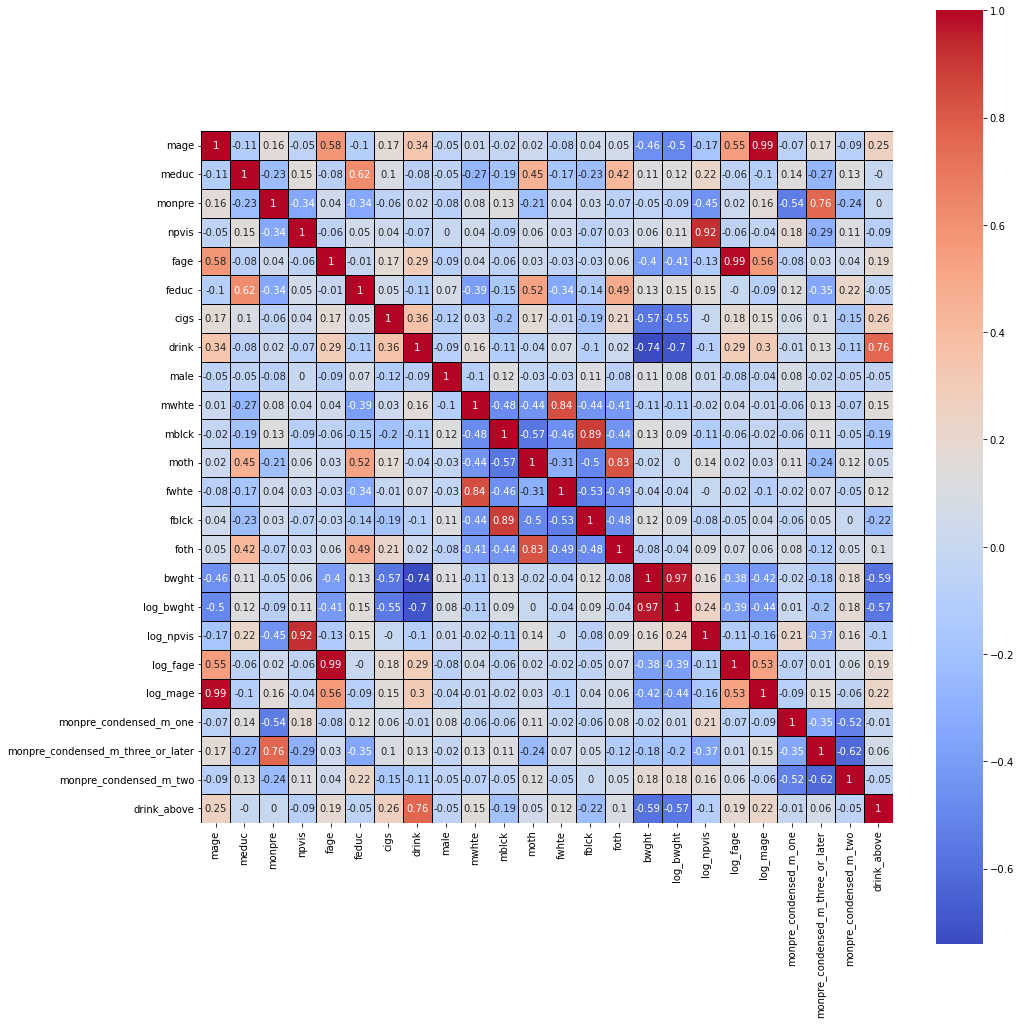

In [18]:
# Setting correlation matrix figure size 
fig, ax = plt.subplots(figsize=(15,15))


# Adjusting the visualisation of the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# Displaying the correlation matrix
plt.tight_layout()
plt.show()

## Feature Engineering 

Some new features is engineered to scale measuring (day/week/month), some is based on own understanding of logical combinations, while others are based on deeper research in field. 

In [19]:
# Engineering a new feature by finding the number of prenatal visits per month
birth_weight['monthly_npvis'] = birth_weight['npvis'] / (10 - birth_weight['monpre'])


# Engineering a feature with amount of cigarettes and drinkes combined per day
birth_weight['cigs_plus_drink'] = birth_weight['cigs'] + (birth_weight['drink'] / 7)


# Engineering a feature with average mother and father education
birth_weight['meduc_feduc'] = (birth_weight['meduc'] + birth_weight['feduc']) / 2


# Engineering a feature combining average mother and father age 
birth_weight['mage_fage'] = (birth_weight['mage'] + birth_weight['fage']) / 2


# Engineering a feature with age difference between mother and father
birth_weight['agedif'] = birth_weight['fage'] - birth_weight['mage']

# Engineering a feature to see if we can capture effect of first child
# as education increases age when mothers have first child. 
# First child often weighs less, if mothers are older there is a higher likelyhood
# of the child not being first. Not Successful attempt, left to show some 
# thought process
birth_weight['magefst'] = birth_weight['mage'] - birth_weight['meduc']

In [20]:
##########################################################################
# Adjusting relationship by squering feature to allow for non-linear trend
##########################################################################

birth_weight['fage2'] = birth_weight['fage'] * birth_weight['fage']
birth_weight['mage2'] = birth_weight['mage'] * birth_weight['mage']
birth_weight['mage_fage2'] = birth_weight['mage_fage'] * birth_weight['mage_fage']
birth_weight['npvis2'] = birth_weight['npvis'] * birth_weight['npvis']
birth_weight['drink2'] = birth_weight['drink'] * birth_weight['drink']
birth_weight['cigs2'] = birth_weight['cigs'] * birth_weight['cigs']
birth_weight['monpre2'] = birth_weight['monpre'] * birth_weight['monpre']
birth_weight['monthly_npvis2'] = birth_weight['monthly_npvis'] * birth_weight['monthly_npvis']

## Regressions

### Statsmodel OLS 

In [21]:
# Printing list of columns for regression
for column in birth_weight:
    print(f"{column} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_bwght +
log_npvis +
log_fage +
log_mage +
monpre_condensed_m_one +
monpre_condensed_m_three_or_later +
monpre_condensed_m_two +
drink_above +
monthly_npvis +
cigs_plus_drink +
meduc_feduc +
mage_fage +
agedif +
magefst +
fage2 +
mage2 +
mage_fage2 +
npvis2 +
drink2 +
cigs2 +
monpre2 +
monthly_npvis2 +


In [22]:
# Instantiating model object
lm_best = smf.ols(formula =  """bwght ~
fage +
meduc +
cigs +
drink
""",
                                data = birth_weight)


# Fitting to the training data
results = lm_best.fit()


# output for analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.32e-48
Time:                        21:10:28   Log-Likelihood:                -1430.1
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     191   BIC:                             2887.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4491.9884    219.417     20.472      0.0

### Setting Final Features

<strong>Finding the best features to predict birth weight </strong><br>
The process towards finding the best fitted model to predict birth weight started with all initial and created features, then eliminating features one by one based on Lasso and ARD coefficients, as well as other features that did not make sense to include in the model.
During the process some models were created with a noticeably higher training results, however, these did not have high enough test results. Moving on from that the tactic was changed, towards to build from bottom add one by one, and testing different simple combinations - almost like an exhausting search.

In [23]:
# Imputing features for final models
features = [ 'bwght' , 'meduc' , 'fage' , 'cigs' , 'drink']

# Defining final data frame
birth_weight = birth_weight.loc[: , features]

In [24]:
############################################################################
# Splitting into train and test data frames
############################################################################


# Preparing explanatory variable data
birth_weight_data   = birth_weight.drop(["bwght"],
                               axis = 1)


# Preparing response variables
birth_weight_target = birth_weight.loc[ : , "bwght"]


# Preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            birth_weight_data,
            birth_weight_target,
            test_size = 0.25,
            random_state = 219)


# Checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 4)
y-side: (147,)


Testing Data
------------
X-side: (49, 4)
y-side: (49,)



### OLS Regression

In [25]:
# Instantiating model object
lr = LinearRegression()


# Fitting to the training data
lr_fit = lr.fit(x_train, y_train)


# Predicting on new data
lr_pred = lr_fit.predict(x_test)

# Scoring the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4)) 
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4)) 

lr_train_score = lr.score(x_train, y_train).round(4)
lr_test_score  = lr.score(x_test, y_test).round(4)

# Displaying and saving the gap between training and testing for comparing later
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6863
OLS Testing Score  : 0.7112
OLS Train-Test Gap : 0.0249


In [26]:
# Zipping each feature name to its coefficient
lr_model_values = zip(birth_weight_data.columns,
                      lr_fit.coef_.round(decimals = 2))


# Setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# Checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4469.73)
('meduc', 33.96)
('fage', -13.55)
('cigs', -39.38)
('drink', -116.32)


### Lasso Regression

In [27]:
# Instantiating model object 
lasso_model = sklearn.linear_model.Lasso(alpha = 2.4,  # Adjusted Alpha to minimize residuals and reduce overfitting to training data 
                                         normalize = True) 


# Fitting to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# Predicting on new data
lasso_pred = lasso_fit.predict(x_test)


# Scoring the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))



# Saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) 
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)  


# Displaying and saving the gap between training and testing for comparing later
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


Lasso Training Score : 0.6806
Lasso Testing Score  : 0.7255
Lasso Train-Test Gap : 0.0449


In [28]:
# Zipping each feature name to its coefficient
lasso_model_values = zip(birth_weight_data.columns, lasso_fit.coef_.round(decimals = 4))


# Setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# Printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# Checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4528.9699)
('meduc', 18.925)
('fage', -11.4376)
('cigs', -35.3204)
('drink', -112.4923)


### ARD Regression

In [29]:
# Instantiating model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False) 


# Fitting the training data
ard_fit = ard_model.fit(x_train, y_train)


# Predicting on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))


# Saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4) 
ard_test_score  = ard_model.score(x_test, y_test).round(4)   


# Displaying and saving the gap between training and testing for comparing later
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6857
Testing Score : 0.7195
ARD Train-Test Gap : 0.0338


In [30]:
# Zipping each feature name to its coefficient
ard_model_values = zip(birth_weight_data.columns, ard_fit.coef_.round(decimals = 5))


# Setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# Printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4532.94)
('meduc', 26.87951)
('fage', -12.81866)
('cigs', -38.46465)
('drink', -117.16154)


### K-Nearest Neighbors 

In [31]:
# Importing packages for KNN regressions and standard scaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler 

# Instantiating a StandardScaler() object
scaler = StandardScaler()


# Fitting the scaler with housing_data
scaler.fit(birth_weight_data)


# Transforming our data after fit
x_scaled = scaler.transform(birth_weight_data)


# Converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# Splitting into train and test data frames for standardised data
x_train, x_test, y_train, y_test = train_test_split(
            x_scaled_df,
            birth_weight_target,
            test_size = 0.25,
            random_state = 219)

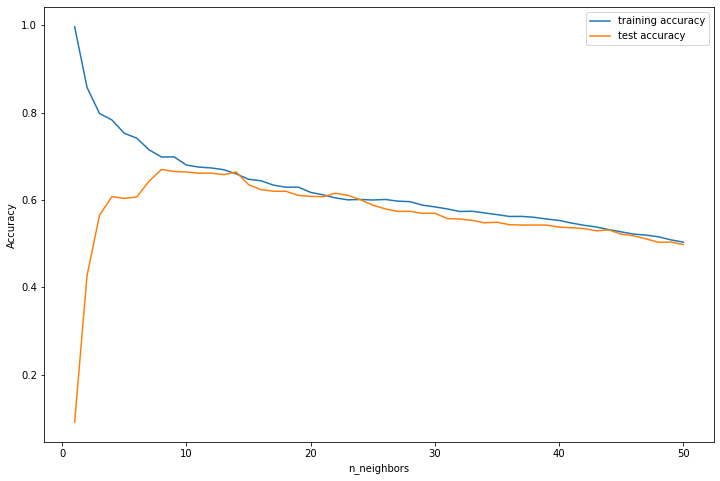

In [32]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [33]:
# Finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1

# Instantiating a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)

# Fitting to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# Predicting on new data
knn_reg_pred = knn_fit.predict(x_test)


# Scoring the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# Saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# Displaying and saving the gap between training and testing for comparing later
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6983
KNN Testing Score : 0.6699
KNN Train-Test Gap: 0.0284


## Comparing Results

### Final Model

While the process to find best combination for statsmodel was rewarding and intriguing, the final result still only utilized basic features, as the modeling went to a more exhausted search approach to overfit it to the test data.

Looking at the final results from the different regressions models, <strong>Lasso</strong> stands out as the best fitted model to predict birth weight from this dataset.

In [34]:
############################################################################
# Lining up train- and test score for all regression models developed, as well 
# as the gap bewteen train and test to compare resutls and decide on the best 
# fitted model
############################################################################

print(f"""
Model      Train Score        Test Score        Train-Test Gap
-----      -----------        -----------       --------------
OLS        {lr_train_score}             {lr_test_score}             {lr_test_gap}
*Lasso     {lasso_train_score}             {lasso_test_score}             {lasso_test_gap}
ARD        {ard_train_score}             {ard_test_score}             {ard_test_gap}
KNN        {knn_reg_score_train}             {knn_reg_score_test}             {knn_reg_test_gap}

* Final model
""")



Model      Train Score        Test Score        Train-Test Gap
-----      -----------        -----------       --------------
OLS        0.6863             0.7112             0.0249
*Lasso     0.6806             0.7255             0.0449
ARD        0.6857             0.7195             0.0338
KNN        0.6983             0.6699             0.0284

* Final model

